In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
x = sc.fit_transform(x)

In [5]:
from minisom import MiniSom

In [6]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [7]:
som.random_weights_init(x)

In [8]:
som.train_random(data = x, num_iteration = 100)

In [9]:
from pylab import bone, pcolor, colorbar, show, plot

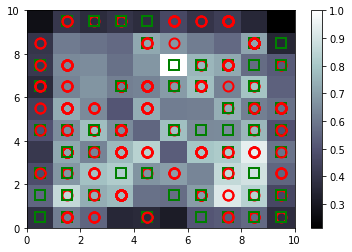

In [10]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

for i, j in enumerate(x):
    w = som.winner(j)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [11]:
mappings = som.win_map(x)

In [15]:
frauds = np.concatenate((mappings[(1,1)], mappings[(5,7)]), axis = 0)

In [17]:
frauds = sc.inverse_transform(frauds)

In [19]:
frauds[: , 0]

array([15678882., 15671769., 15774262., 15638989., 15717065., 15790113.])